#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 07
**CH07 OLS fit simulation**

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.font_manager
from mizani.formatters import percent_format
from mizani import transforms
from plotnine import *
from datetime import datetime
from scipy.stats import norm
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
output = dirname + "da_case_studies/ch07-ols-simulation/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

# Import the prewritten helper functions
from py_helper_functions import *

Set random seed

In [3]:
rng = np.random.default_rng(1458)

Set sample size

In [4]:
n = 100

xvar - uniformly distributed x, [0,4]

In [5]:
xvar = rng.uniform(0, 4, n)

yvar - y  = a + bx + u (u normally distributed)

In [6]:
a = 2
b = 0.5
sigmau = 0.7
yvar = a + b * xvar + rng.normal(0, sigmau, size=n)

In [7]:
ols = pd.DataFrame({"yvar": yvar, "xvar": xvar})

In [8]:
reg = smf.ols(formula="yvar~xvar", data=ols).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   yvar   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     61.16
Date:                Mon, 17 Oct 2022   Prob (F-statistic):           6.12e-12
Time:                        17:41:08   Log-Likelihood:                -105.40
No. Observations:                 100   AIC:                             214.8
Df Residuals:                      98   BIC:                             220.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0096      0.138     14.601      0.000       1.736       2.283
xvar           0.4716      0.060      7.820      0.000       0.352       0.591
==============================================================================
Omnibus:                        7.693   Durbin-Watson:                   2.166
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                8.207
Skew:                          -0.473   Prob(JB):                       0.0165
Kurtosis:                       4.037   Cond. No.                         5.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

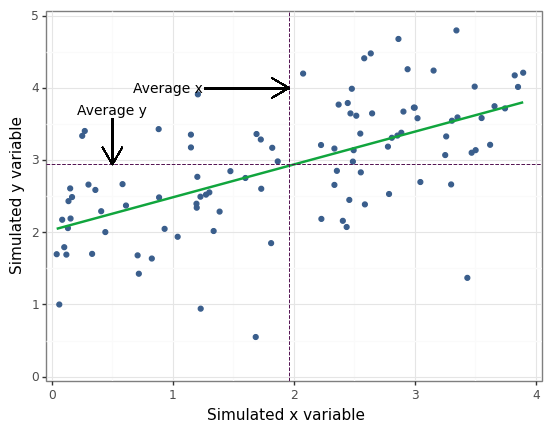

<ggplot: (676274960)>

In [9]:
mean_x = round(np.mean(xvar), 2)
mean_y = round(np.mean(yvar), 2)

(
    ggplot(ols, aes(x="xvar", y="yvar"))
    + geom_point(color=color[0])
    + geom_smooth(color=color[1], se=False, method="lm")
    + expand_limits(x=0.01, y=0.01)
    + scale_x_continuous(expand=(0.01, 0.01), limits=(0, 4), breaks=seq(0, 4, by=1))
    + scale_y_continuous(expand=(0.01, 0.01), limits=(0, 5), breaks=seq(0, 5, by=1))
    + labs(x="Simulated x variable", y="Simulated y variable")
    + theme_bw()
    + geom_vline(xintercept=mean_x, color=color[2], linetype="dashed", size=0.4)
    + geom_segment(
        aes(x=mean_x - 0.7, y=4, xend=mean_x, yend=4),
        arrow=arrow(),
    )
    + annotate("text", x=mean_x - 1, y=4, label="Average x", size=10)
    + geom_hline(yintercept=mean_y, color=color[2], linetype="dashed", size=0.4)
    + geom_segment(aes(x=0.5, y=mean_y + 0.65, xend=0.5, yend=mean_y), arrow=arrow())
    + annotate("text", x=0.5, y=mean_y + 0.75, label="Average y", size=10)
)